In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv('student_score.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Understanding you data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
data.shape

(25, 2)

In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.duplicated().sum()

0

In [14]:
data.corr()['Scores']

Hours     0.976191
Scores    1.000000
Name: Scores, dtype: float64

# univarite analyis

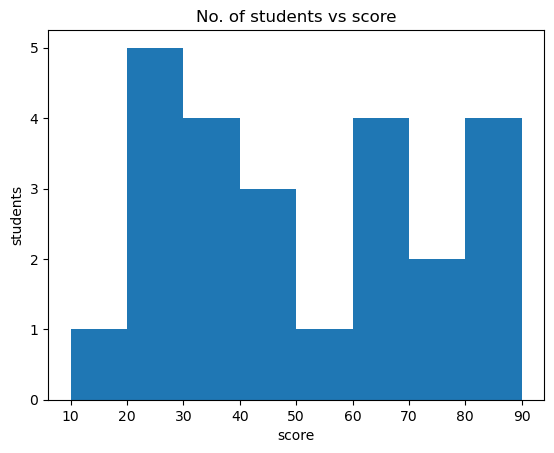

In [23]:
plt.hist(data['Scores'], bins=[10,20,30,40,50,60,70,80,90])
plt.xlabel('score')
plt.ylabel('students')
plt.title('No. of students vs score')
plt.show()

<Axes: ylabel='Scores'>

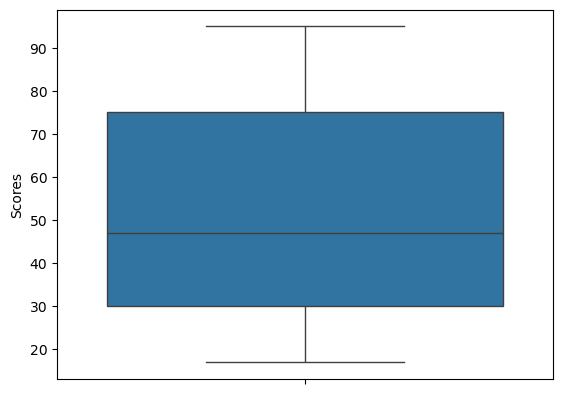

In [29]:
sns.boxplot(data['Scores'])

# Bivariate analysis

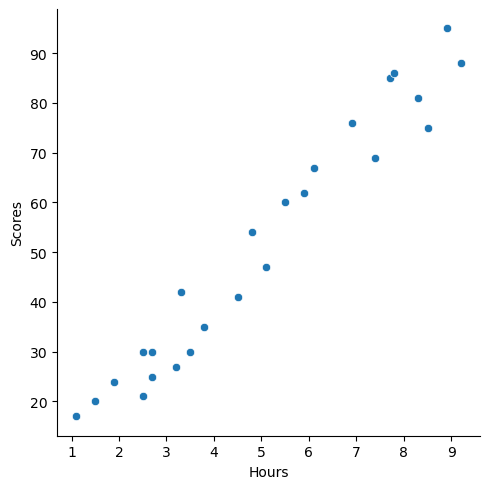

In [35]:
sns.relplot(x='Hours',y='Scores',data=data)

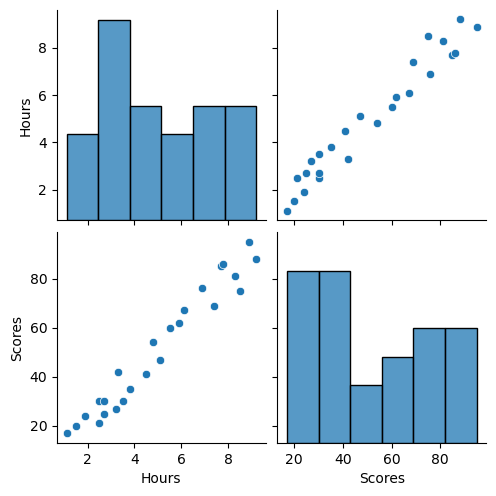

In [36]:
sns.pairplot(data)

# Train Test Split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('Scores',axis=1),data['Scores'],test_size=0.1)

# Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler 

In [65]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Model training

In [50]:
linear=LinearRegression()

In [66]:
linear.fit(x_train_scaled,y_train)

LinearRegression()

# Prediction and accuracy

In [74]:
y_pred=linear.predict(x_test_scaled)

In [75]:
from sklearn.metrics import r2_score

print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.9583275733632509
